**Name: Kichaiahgari Manisha Reddy**

**pin no: 221710309027**

## **Problem Statement:**

To automate the loan approval process (real time) based on customer detail provided while filling online application form.

## **Dataset Description:**

**Loan_ID:**  Unique Loan ID

**Gender:** 	Male/ Female

**Married:** 	Applicant married (Y/N)

**Dependents:** 	Number of dependents

**Education:**	Applicant Education (Graduate/ Under Graduate)

**Self_Employed:** 	Self employed (Y/N)

**ApplicantIncome:** 	Applicant income

**CoapplicantIncome:** 	Coapplicant income

**LoanAmount:** 	Loan amount in thousands

**Loan_Amount_Term:** 	Term of loan in months

**Credit_History:** 	credit history meets guidelines

**Property_Area:** 	Urban/ Semi Urban/ Rural

**Loan_Status:** 	Loan approved (Y/N)

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#versions of packages used
print("Version of pandas package: ", pd.__version__)
print("Version of numpy package: ", np.__version__)
print("Version of seaborn package: ", sns.__version__)

Version of pandas package:  1.0.5
Version of numpy package:  1.18.5
Version of seaborn package:  0.10.1


In [ ]:
from google.colab import drive  # mounting my google drive to colab
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/2020/courses taken/ds/resources/loan.csv') #reading my csv file
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#finding number of null values in the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# describing the numerical column values with count,mean,std,min,max etc.,
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## DATA VISUALIZATION


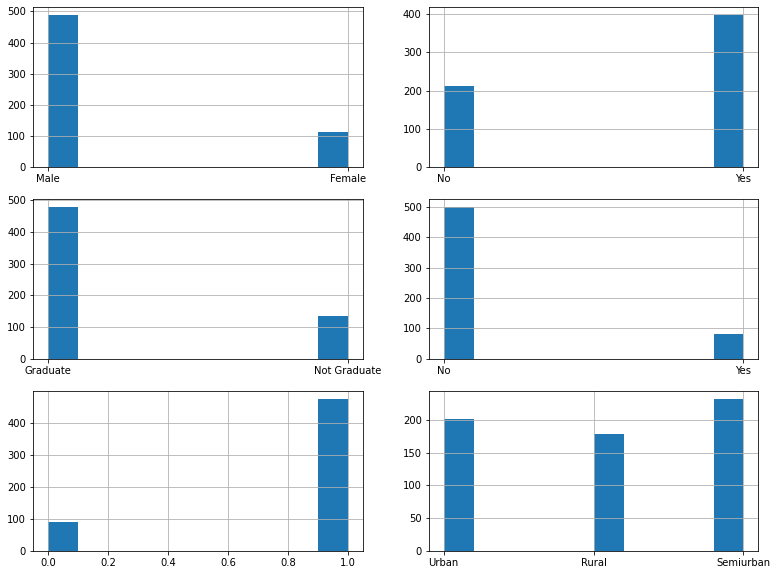

In [ ]:
#VIsualizing the count of categorical columns in one plot using subplot()
cols = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
i=0
j=0
k=0
fig, ax = plt.subplots(3,2, figsize = (13,10))
for i in range(3):
  for j in range(2):
    df[cols[k]].hist(ax=ax[i][j])
    k=k+1

**The graph below reveals that the loan is granted more to the male population than to the female population.**


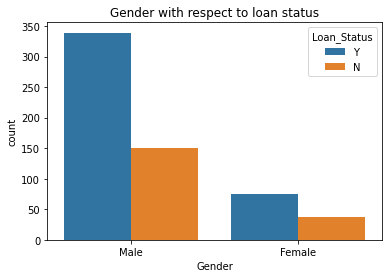

In [ ]:
# count plot with respect to target column
plt.title("Gender with respect to loan status")
sns.countplot(df['Gender'],hue = df['Loan_Status'])

**The graph below reveals that the loan is granted more to the Married population than to the Bachelors population.**


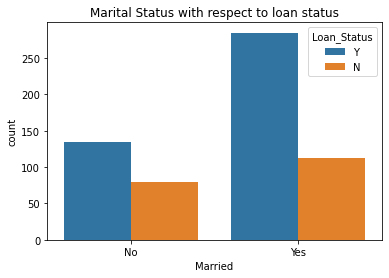

In [ ]:
# count plot with respect to target column
plt.title("Marital Status with respect to loan status")
sns.countplot(df['Married'],hue = df['Loan_Status'])

**The graph below shows the loan is given more to the population of Semi Urban (or Towns) than to the rest of the population.**


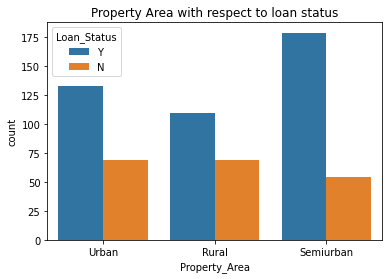

In [ ]:
# count plot with respect to target column
plt.title("Property Area with respect to loan status")
sns.countplot(df['Property_Area'],hue = df['Loan_Status'])

**The graph below shows the loan is given more to the applicants with zero dependents than to the rest of the population.**

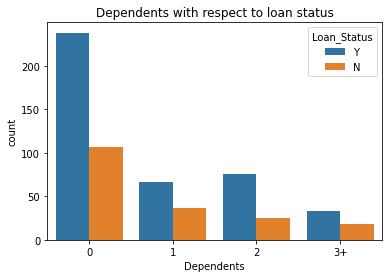

In [ ]:
# count plot with respect to target column
plt.title("Dependents with respect to loan status")
sns.countplot(df['Dependents'],hue = df['Loan_Status'])

**The graph below shows the loan is given more to the Applicants who are not self employed than to the rest of the Applicants.**

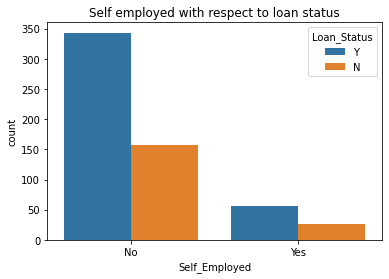

In [ ]:
# count plot with respect to target column
plt.title("Self employed with respect to loan status")
sns.countplot(df['Self_Employed'],hue = df['Loan_Status'])

In [ ]:
# We have replaced missing values of Gender column with mode of Gender column
df.Gender = df.Gender.fillna(df.Gender.mode)
# We have replaced Male:1 and Female:0
x = df.Gender
x = np.array(x)
l1 = []
for i in x:
  if i == 'Male':
    l1.append(1)
  else:
    l1.append(0)
l1=np.array(l1)
df.Gender = l1

# We have replaced missing values of Married column with mode of Married column
df.Married = df.Married.fillna(df.Married.mode)
# We have replaced Yes: 1 and No: 0
x1 = np.array(df.Married)
l2 = []
for i in x1:
  if i == 'Yes':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Married = l2

# We have replaced missing values of Dependents column with mode of Dependents column
df.Dependents = df.Dependents.fillna(df.Dependents.mode)
# We replaced 0 : 0 / 1: 1 / 2: 2 / 3+: 3
x1 = np.array(df.Dependents)
l2 = []
for i in x1:
  if i == '3+':
    l2.append(3)
  elif i == '0':
    l2.append(0)
  elif i == '1':
    l2.append(1)
  else:
    l2.append(2)
l2 = np.array(l2)
df.Dependents = l2

# We replaced Graduate: 1 and not Graduate: 0
x1 = np.array(df.Education)
l2 = []
for i in x1:
  if i == 'Graduate':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Education = l2

# We have replaced missing values of Self_Employed column with mode of Self_Employed column
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode)
# We replaced Yes: 1 and No: 0
x1 = np.array(df.Self_Employed)
l2 = []
for i in x1:
  if i == 'Yes':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Self_Employed = l2

In [ ]:
# We have replaced missing values of LoanAmount, Loan_Amount_Term column with mean of LoanAmount, Loan_Amount_Term column respectively
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

# Replaced null values of Credit_history with its mode value(i.e., 1)
df.Credit_History = df.Credit_History.fillna(1)

# Mapped Rural:0 / Semiurban:1 / Urban: 2 in property area column
x1 = np.array(df.Property_Area)
l2 = []
for i in x1:
  if i == 'Rural':
    l2.append(0)
  elif i == 'Semiurban':
    l2.append(1)
  else:
    l2.append(2)
l2 = np.array(l2)
df.Property_Area = l2

#mapped Yes:1 and No:0 in target column
x1 = np.array(df.Loan_Status)
l2 = []
for i in x1:
  if i == 'Y':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Loan_Status = l2

**After the analysis of the categorical and numerical data it is observed that loan status mostly depends on categorical data than on neumerical data**

In [ ]:
df=df.drop(columns='Loan_ID',axis=1)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
# dummies for Property_Area Column
df_final = pd.concat([df, pd.get_dummies(df['Property_Area'], drop_first=True, prefix='Area')], axis=1)
df_final = df_final.drop(columns='Property_Area',axis=1)

In [ ]:
df_final = df_final.drop(columns='Loan_Status',axis=1)

In [ ]:
# Dummies fro depentents Column
df_final = pd.concat([df_final, pd.get_dummies(df['Dependents'], drop_first=True, prefix='Dept')], axis=1)
df_final = df_final.drop(columns='Dependents',axis=1)

In [ ]:
df_final.shape

(614, 14)

In [ ]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Model Creation


### Spliting data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(df_final,df['Loan_Status'],test_size=0.2,random_state = 3)

## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression #importing package

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train) #fitting model with training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score #importing packages

y_pred = log_clf.predict(X_train) #prediction with training model
print("Train F1 Score ", f1_score(y_train,y_pred)) #calculating performance
print("Train Accuracy ", accuracy_score(y_train,y_pred))

Train F1 Score  0.8637602179836512
Train Accuracy  0.7963340122199593


In [ ]:
y_pred = log_clf.predict(X_test) #prediction with testing data
print("Accuracy score: ", accuracy_score(y_test,y_pred)) #calculating performance
print("f1_score: ", f1_score(y_test,y_pred))

Accuracy score:  0.8617886178861789
f1_score:  0.9162561576354681


Accuracy_score:  0.8617886178861789


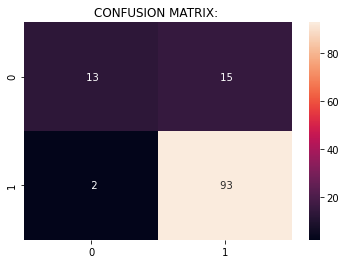

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_pred)

plt.title("CONFUSION MATRIX: ") #plotting confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='3.0f')

TP = conf[1][1] #True Positive (TP) : Observation is positive, and is predicted to be positive.
FN = conf[1][0] #False Negative (FN) : Observation is positive, but is predicted negative.
TN = conf[0][0] #True Negative (TN) : Observation is negative, and is predicted to be negative.
FP = conf[0][1] #False Positive (FP) : Observation is negative, but is predicSted positive.
print("Accuracy_score: ", (TP + TN) / (TP + FP + FN + TN)) # Calculating accuracy using confusion matrix values

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier #importing packages

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train) #fitting the model

from sklearn.metrics import accuracy_score,f1_score
y_pred = tree_clf.predict(X_train) # predicting with training dataset
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0


In [ ]:
from sklearn.metrics import classification_report #importing packages

y_test_pred = tree_clf.predict(X_test) #prediction with testing data set
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_test_pred)) #calculating performance
print("Training Data F1 Score ", f1_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

Training Data Set Accuracy:  0.6666666666666666
Training Data F1 Score  0.768361581920904
              precision    recall  f1-score   support

           0       0.34      0.50      0.41        28
           1       0.83      0.72      0.77        95

    accuracy                           0.67       123
   macro avg       0.59      0.61      0.59       123
weighted avg       0.72      0.67      0.69       123



## HyperParameter Tuning For Decision Tree over (max Depth and min Samples leaf)

In [ ]:
grid_param = {
    'max_depth' : range(2,40,1), # using max_depth and min_samples_leaf only for the best param calculating
    'min_samples_leaf' : range(1,80,3)
}         
from sklearn.model_selection import RandomizedSearchCV #importing packages
clf = DecisionTreeClassifier()
grid_search1 = RandomizedSearchCV(estimator=clf, param_distributions=grid_param,cv=10,n_jobs=50,verbose=1) # cv = 10 to increase model performance n_jobs to make the process quick
grid_search1.fit(X_train,y_train) #fitting the model

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:   36.8s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [ ]:
grid_search1.best_params_ #viewing the best parameter values

{'max_depth': 7, 'min_samples_leaf': 58}

In [ ]:
from sklearn.metrics import confusion_matrix #importing packages
tree_clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf = 58) # creating model with best params

tree_clf.fit(X_train,y_train) #fitting the model
y_pred = tree_clf.predict(X_test) # testing with test data
print("Test Accuracy: ",accuracy_score(y_test,y_pred)) #calculating performance
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9170731707317074


## Metics for final Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix #importing packages
conf = confusion_matrix(y_test, y_pred) # confusion matrix for testing data
conf #printing values

array([[12, 16],
       [ 1, 94]])

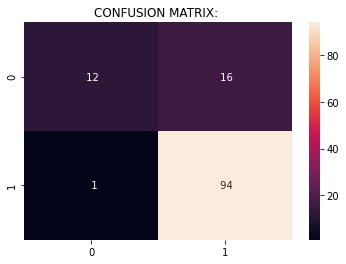

In [ ]:
plt.title("CONFUSION MATRIX: ") # plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='3.0f')

In [ ]:
TP = conf[1][1] #True Positive (TP) : Observation is positive, and is predicted to be positive.
FN = conf[1][0] #False Negative (FN) : Observation is positive, but is predicted negative.
TN = conf[0][0] #True Negative (TN) : Observation is negative, and is predicted to be negative.
FP = conf[0][1] #False Positive (FP) : Observation is negative, but is predicted positive.
(TP + TN) / (TP + FP + FN + TN) # Calculating accuracy using confusion matrix values

0.8617886178861789

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier #importing packages

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train) #fitting the model with training data

y_pred = rf_clf.predict(X_train) #predicting with training data
print("Train F1 Score ", f1_score(y_train,y_pred)) #calculating performance
print("Train Accuracy ", accuracy_score(y_train,y_pred))

Train F1 Score  1.0
Train Accuracy  1.0


In [ ]:
y_pred = rf_clf.predict(X_test) #predicting with testing data
print("Test Accuracy: ",accuracy_score(y_test,y_pred)) #calculating performance
print("Test F1 Score: ",f1_score(y_test,y_pred))

Test Accuracy:  0.8373983739837398
Test F1 Score:  0.9


## Hyper parameter Tuning of Random Forest classifier (criterion, n_estimators,max_depth,min_smaples_leaf)

In [ ]:
grid_param = {
    'criterion': ['gini', 'entropy'], #considering 4 different parameters
    'n_estimators': range(1,300,10),
    'max_depth' : range(1,100,1),
    'min_samples_leaf' : range(1,10,1),
    
}   

clf = RandomForestClassifier() #creating model
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=grid_param)
grid_search.fit(X_train,y_train) #fitting model with training data

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
grid_search.best_params_ #viewing best values for the given parameters

{'criterion': 'gini',
 'max_depth': 42,
 'min_samples_leaf': 7,
 'n_estimators': 81}

In [ ]:
clf = RandomForestClassifier(criterion= 'gini', max_depth= 42, min_samples_leaf=7, n_estimators=81) #creating model with best params

clf.fit(X_train,y_train) #fitting the model with training data
y_test_pred = clf.predict(X_test) #predicting with testing data
 
print("accuracy_score: ", accuracy_score(y_test,y_test_pred)) #calculating performance
print("f1_score: ", f1_score(y_test,y_test_pred))

accuracy_score:  0.8617886178861789
f1_score:  0.9170731707317074


## Metrics for Final Random Forest classifiers

Accuracy_score:  0.8617886178861789


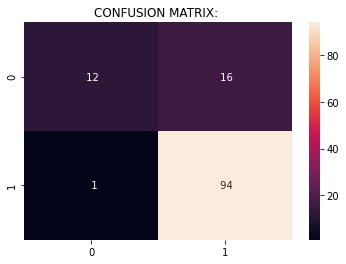

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score #importing packages
conf = confusion_matrix(y_test, y_test_pred) #finding confusion matrix

plt.title("CONFUSION MATRIX: ") #plotting confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f')

TP = conf[1][1] #True Positive (TP) : Observation is positive, and is predicted to be positive.
FN = conf[1][0] #False Negative (FN) : Observation is positive, but is predicted negative.
TN = conf[0][0] #True Negative (TN) : Observation is negative, and is predicted to be negative.
FP = conf[0][1] #False Positive (FP) : Observation is negative, but is predicted positive.
print("Accuracy_score: ", (TP + TN) / (TP + FP + FN + TN)) # Calculating accuracy using confusion matrix values

## Boosting( Xtreme Gradient Boosting) XGboost

In [ ]:
parms = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.35,0.40,0.01,0.001 ] , #set of parameters to consider for the model
 "max_depth"        : range(1,500,2),
 "min_child_weight" : range(1,500,3),
 "gamma"            : range(1,500,5),
 "colsample_bytree" : [0.01,0.02,0.03,0.1,0.2,0.3,0.6,0.7] }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #importing packages
import xgboost as xgb

bst = xgb.XGBClassifier() 
key = RandomizedSearchCV(estimator=bst,param_distributions=parms,cv=5)
key.fit(X_train,y_train) #fitting the model

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.01, 0.02, 0.03,
                                     

In [ ]:
y_train_pred = key.predict(X_train) #predicting with training data

print("accuracy_score: ",accuracy_score(y_train,y_train_pred)) #calculating performance
print("f1_score: ",f1_score(y_train,y_train_pred))

accuracy_score:  0.6659877800407332
f1_score:  0.7995110024449877


In [ ]:
y_test_pred = key.predict(X_test) #predicting with testing data

print("accuracy_score: ",accuracy_score(y_test,y_test_pred)) #calculating performance
print("f1_score: ",f1_score(y_test,y_test_pred))

accuracy_score:  0.7723577235772358
f1_score:  0.8715596330275228


In [ ]:
xg = xgb.XGBClassifier() 
xg.fit(X_train,y_train) #fitted model with best parameters again

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xg.predict(X_test) #predicting with test data

print("Accuracy score: ", accuracy_score(y_test,y_pred)) #calculating performance
print("f1_score: ", f1_score(y_test,y_pred))

Accuracy score:  0.8455284552845529
f1_score:  0.9064039408866994


Accuracy_score:  0.8455284552845529


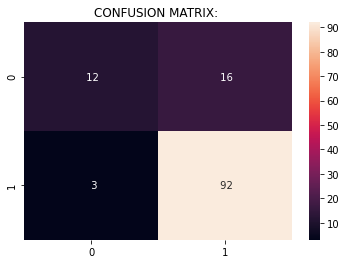

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score #importing packages
conf = confusion_matrix(y_test, y_pred)

plt.title("CONFUSION MATRIX: ")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='3.0f') #printing confusion matrix

TP = conf[1][1] #True Positive (TP) : Observation is positive, and is predicted to be positive.
FN = conf[1][0] #False Negative (FN) : Observation is positive, but is predicted negative.
TN = conf[0][0] #True Negative (TN) : Observation is negative, and is predicted to be negative.
FP = conf[0][1] #False Positive (FP) : Observation is negative, but is predicSted positive.
print("Accuracy_score: ", (TP + TN) / (TP + FP + FN + TN)) # Calculating accuracy using confusion matrix values

Models used vs their accuracy values:

LOGISTIC REGRESSION :- 86.1788%

FINAL DECISION TREE CLASSIFIER MODEL:-86.1788%

FINAL RANDOM FOREST CLASSIFIER MODEL:- 86.1788%

XGBoost:- 84.5528%